Running on batch size: 1
1


decoding: 100%|██████████| 1/1 [00:01<00:00,  1.33s/it]


# ::tok I remember when my father taught me to swim , we were on a family vacation when he showed me how to swim in the cold waters of the ocean .
(r / remember-01~1
    :ARG0 (i / i~0)
    :ARG1 (v / vacation-01~15
        :ARG0 (w2 / we~10)
        :mod (f / family~14)
        :time (t / teach-01~5
            :ARG0 (p / person~4
                :ARG0-of (h / have-rel-role-91~4
                    :ARG1 i
                    :ARG2 (f2 / father~4)))
            :ARG1 (s2 / swim-01~8
                :ARG0 i)
            :ARG2 i)
        :time-of (s / show-01~18
            :ARG0 w2
            :ARG1 (t2 / thing~20
                :manner-of (s3 / swim-01~22
                    :ARG0 i
                    :ARG2 (w / water~26
                        :ARG1-of (c / cold-01~25)
                        :part-of (o / ocean~29))))
            :ARG2 i)))

# ::tok I remember when my father taught me to swim , we were on a family vacation when he showed me how to swim in the cold waters of the oc

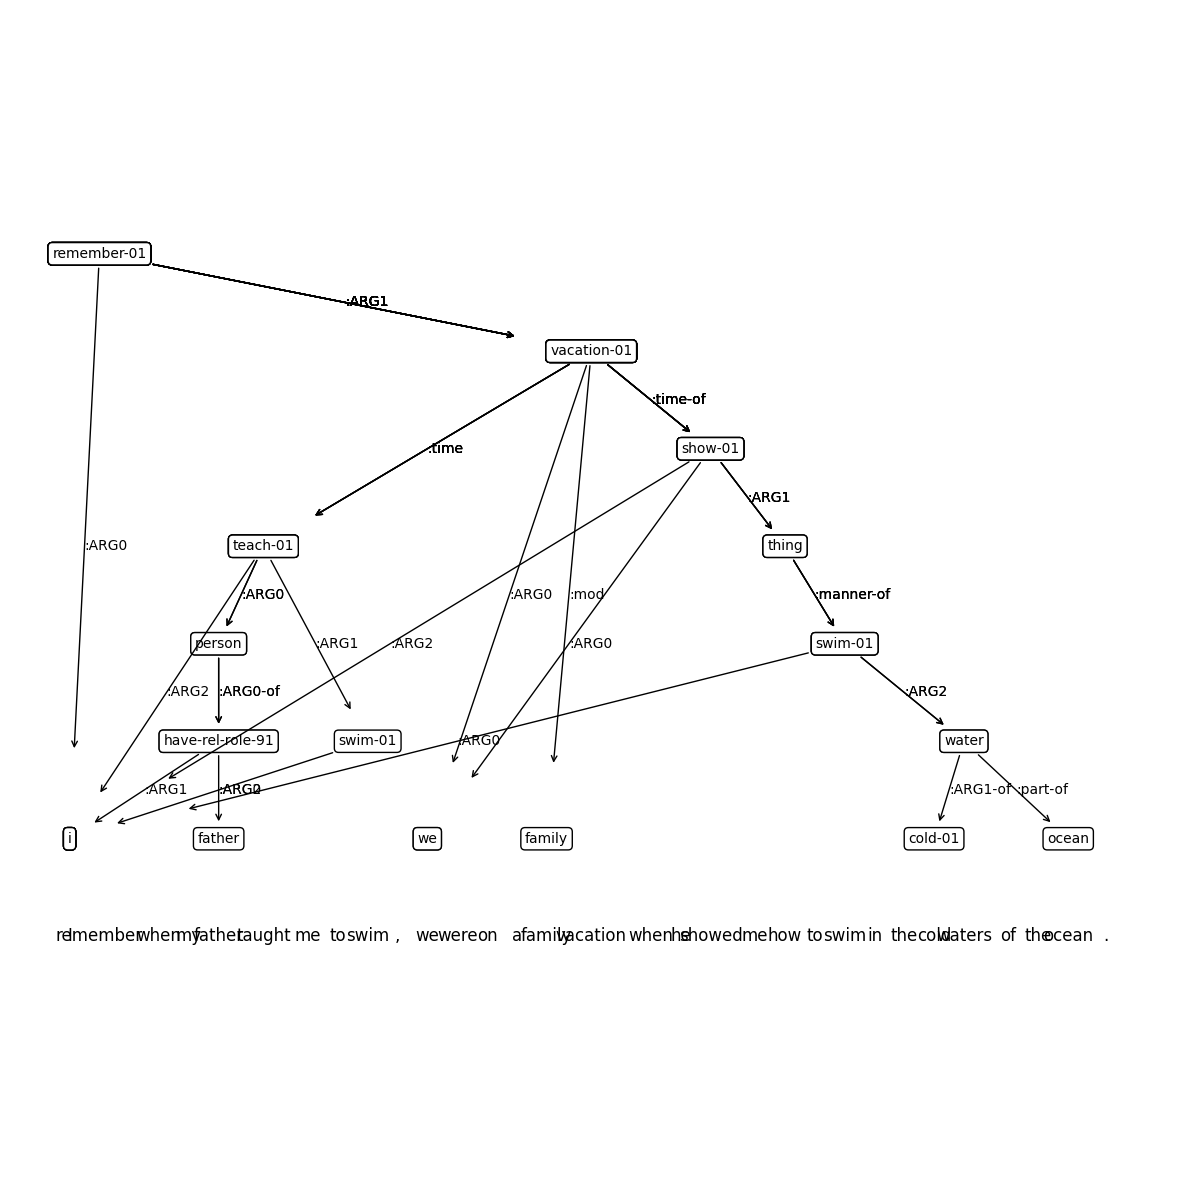

In [13]:
import torch 
import torch_scatter
from transition_amr_parser.parse import AMRParser

# Download and save a model named AMR3.0 to cache
parser = AMRParser.from_pretrained('AMR3-structbart-L')

sentences = [
    "All the people crowd together at every farmers' market, happy to sell their goods.",
    "The sun makes its way through the mountain peaks rising above the mist.",
    "The dampness of the forest, along with the sounds made by animals, are scaring me a lot!",
    "The dog runs after its favorite frisbee while its owner is sitting on a bench and reading his favorite magazine.",
    "It is the first time the little boy manages to ride his new bike, his mother must be so proud of him!",
    "I remember my grandmother cooking my favorite dishes on every Christmas dinner when I was a child.",
    "The cold grips the snowy forest, and walking in the forest without hearing the little birds singing again is so weird.",
    "I remember when my father taught me to swim, we were on a family vacation when he showed me how to swim in the cold waters of the ocean."
]

tokens, positions = parser.tokenize(sentences[7])

# Use parse_sentence() for single sentences or parse_sentences() for a batch
annotations, machines = parser.parse_sentence(tokens)

# Print Penman notation
print(annotations)

# Print Penman notation without JAMR, with ISI
amr = machines.get_amr()
print(amr.to_penman(jamr=False, isi=True))

# Plot the graph (requires matplotlib)
amr.plot(figsize=(12,12))


In [ ]:
import os
from transition_amr_parser.parse import AMRParser

print("Loading AMR Parser...")
parser = AMRParser.from_pretrained('AMR3-structbart-L')
print("Parser loaded.")

input_file = 'llmsentences.txt'  
output_dir = 'amr_sentences'  

os.makedirs(output_dir, exist_ok=True)

with open(input_file, 'r') as infile:
    print("Processing sentences...")
    
    for index, line in enumerate(infile, start=1):
        sentence = line.strip()  
        if not sentence:
            continue  
        
        try:
            tokens, positions = parser.tokenize(sentence)
            annotations, machines = parser.parse_sentence(tokens)
            
            amr = machines.get_amr()
            # amr.plot(figsize=(10,10))  # Plot the graph
            amr_penman = amr.to_penman(jamr=False, isi=True)
            
            output_file = os.path.join(output_dir, f"sentence_{index}.amr")
            with open(output_file, 'w') as outfile:
                outfile.write(f"# Sentence: {sentence}\n")
                outfile.write(amr_penman)
            
            print(f"Processed: {sentence} -> {output_file}")
        
        except Exception as e:
            print(f"Error processing sentence {index}: {sentence}")
            print(f"Error: {e}")

print(f"AMR representations saved in {output_dir}")


In [ ]:
import os
import matplotlib.pyplot as plt
from transition_amr_parser.parse import AMRParser
import json

print("Loading AMR Parser...")
parser = AMRParser.from_pretrained('AMR3-structbart-L')
print("Parser loaded.")

input_file = 'output_extracted.txt'  
output_dir = 'amr_llm'  

os.makedirs(output_dir, exist_ok=True)

with open(input_file, 'r') as infile:
    print("Processing sentences...")
    for index, line in enumerate(infile, start=1):
        sentence = line.strip()  
        id = sentence.split()[0]
        if not sentence:
            continue  
        
        try:
            tokens, positions = parser.tokenize(sentence)
            annotations, machines = parser.parse_sentence(tokens)
            
            amr = machines.get_amr()
            amr_penman = amr.to_penman(jamr=False, isi=True)
            
            amr_file = os.path.join(output_dir, f"sentence_{id}.amr")
            with open(amr_file, 'w') as outfile:
                outfile.write(f"#{id} Sentence: {sentence}\n")
                outfile.write(amr_penman)
            
            # save the graph visualization
            # graph_file = os.path.join(output_dir, f"sentence_{index}.png")
            # amr.plot(figsize=(12, 12))
            # print(f"Processed: {sentence} -> {amr_file}, {graph_file}")
        
        except Exception as e:
            print(f"Error processing sentence {index}: {sentence}")
            print(f"Error: {e}")


In [28]:
# parse human responses to extract the AMR representations
def generate_response_file(json_file, output_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)
    
    responses = data.get("prompt_responses", {})
    
    with open(output_file, 'w', encoding='utf-8') as f:
        for prompt_id, details in responses.items():
            response = details.get("response", "")
            f.write(f"{prompt_id} {response}\n")
    
    print(f"File '{output_file}' generated successfully.")

json_file = "petru_71.json"  #
output_file = "output_extracted.txt"  

generate_response_file(json_file, output_file)

File 'outputt1.txt' generated successfully.


In [1]:
import json
# parse llm responses to extract only the answers in order to generate amr
def generate_response_file(json_file, output_file):
    with open(json_file, 'r', encoding='utf-8') as f:
        data = json.load(f)

    with open(output_file, 'w', encoding='utf-8') as f:
        sorted_keys = sorted(data.keys(), key=lambda x: int(x))
        
        for prompt_id in sorted_keys:
            details = data[prompt_id]
            generated_text = details.get("generated_text", "")
            f.write(f"{prompt_id.zfill(5)} {generated_text}\n")

    print(f"File '{output_file}' generated successfully.")

json_file = "responses_llm.json"  
output_file = "output_extracted.txt"  

generate_response_file(json_file, output_file)


File 'outputt1.txt' generated successfully.


In [32]:
import json
import glob
# merge multiple jsons with human collected data into one
def merge_json_files(input_folder, output_file):
    merged_data = {
        "session_start_time": None,
        "session_end_time": None,
        "prompt_responses": {},
        "total_prompts": 0
    }
    
    json_files = glob.glob(f"{input_folder}/*.json")
    json_files.sort()
    for json_file in json_files:
    
        with open(json_file, 'r', encoding='utf-8') as f:
            data = json.load(f)
        
        if not merged_data["session_start_time"] or data["session_start_time"] < merged_data["session_start_time"]:
            merged_data["session_start_time"] = data["session_start_time"]
        if not merged_data["session_end_time"] or data["session_end_time"] > merged_data["session_end_time"]:
            merged_data["session_end_time"] = data["session_end_time"]
        
        merged_data["prompt_responses"].update(data.get("prompt_responses", {}))
        
        merged_data["total_prompts"] += data.get("total_prompts", 0)
    
    with open(output_file, 'w', encoding='utf-8') as f:
        json.dump(merged_data, f, indent=4)
    
    print(f"Merged JSON saved to {output_file}")

input_folder = "json_files"  
output_file = "merged_output.json" 
merge_json_files(input_folder, output_file)


Merged JSON saved to merged_output.json
